# 📈 Linear Regression — Step-by-Step Explanation

## Step 1: Import Required Libraries
First, we import the necessary libraries:
- `pandas` → for handling datasets
- `numpy` → for numerical operations
- `matplotlib / seaborn` → for visualization
- `sklearn` → for building the Linear Regression model

In [108]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


## Step 2: Load the Dataset
We load the dataset using `pandas`.
This allows us to:
- View the data
- Understand features (independent variables)
- Identify the target variable (dependent variable)

In [139]:

df = pd.read_csv("Salary_Data.csv")


## Step 3: Explore the Data
Before building a model, we:
- Check the first few rows (`head()`)
- Check data types (`info()`)
- Check summary statistics (`describe()`)
- Identify missing values

This helps us understand the structure and quality of the data.

In [140]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [111]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Step 4: Define Features (X) and Target (y)
- **X (Independent Variable)** → Input features
- **y (Dependent Variable)** → Output we want to predict

Example:
If predicting Salary:
- X = YearsExperience
- y = Salary

In [112]:
X = df[["YearsExperience"]]
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [113]:
y = df["Salary"]
y.head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

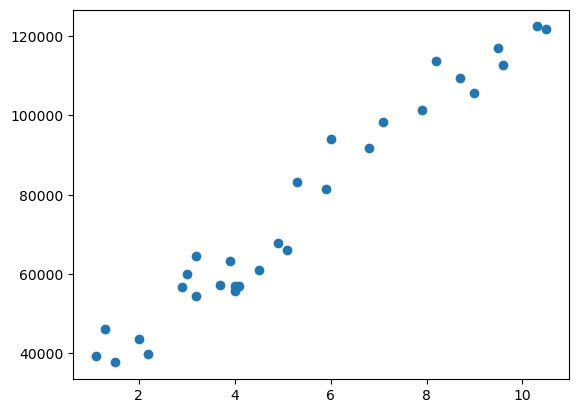

In [114]:
plt.scatter(X,y)

## Step 5: Split the Dataset
We split the data into:
- **Training Data (80%)** → Used to train the model
- **Testing Data (20%)** → Used to evaluate performance

This prevents overfitting and helps test real-world performance.

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 6: Create the Linear Regression Model
We import and initialize the model:

`from sklearn.linear_model import LinearRegression`

Then we create:
`model = LinearRegression()`

In [116]:
model = LinearRegression()

## Step 7: Train the Model
We train the model using:

`model.fit(X_train, y_train)`"

The model learns the relationship between input (X) and output (y).

In [117]:
model.fit(X_train,y_train)

LinearRegression()

## Step 8: Make Predictions
We use the trained model to predict values:

`y_pred = model.predict(X_test)`

This gives predicted output values.

In [118]:
y_pred = model.predict(X_test)
y_pred

array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

## Step 8: Evaluate the Model
We measure performance using:
- **Mean Absolute Error (MAE)**
- **Mean Squared Error (MSE)**
- **R² Score**

R² Score tells how well the model explains the data.

In [121]:
import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse) # or mse**(0.5)  

r2 = metrics.r2_score(y_test,y_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 6286.453830757749
MSE: 49830096.85590839
RMSE: 7059.04362190151
R-Squared: 0.9024461774180497


## Step 9: Visualize the Results
We plot:
- Actual values
- Predicted regression line

This helps visually understand how well the model fits the data.


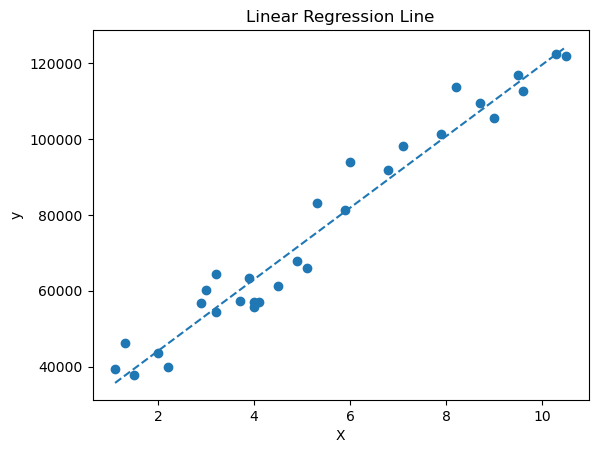

In [124]:
plt.scatter(X, y)
plt.plot(X, model.predict(X), linestyle='--')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Line")
plt.show()

# ✅ Final Understanding

Linear Regression tries to find the best straight line:

y = mx + b

Where:
- m = slope (relationship strength)
- b = intercept
- y = predicted value
- x = input feature

It is used when the relationship between variables is linear.

In [125]:
m = model.coef_

In [126]:
c = model.intercept_

In [132]:
print("Slope :",m)
print("Intercept",c)
print(X_test)
print("Predicts for X:",y_pred)


Slope : [9423.81532303]
Intercept 25321.583011776813
    YearsExperience
27              9.6
15              4.9
23              8.2
17              5.3
8               3.2
9               3.7
Predicts for X: [115790.21011287  71498.27809463 102596.86866063  75267.80422384
  55477.79204548  60189.69970699]


### Predicting New data

In [134]:
X_new = pd.read_csv("Salary_Data_uk.csv")
X_new

,YearsExperience
0,7.5


In [138]:
Y_new = model.predict(X_new)
print(Y_new)

[96000.19793451]
